In [178]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statistics import mode

In [179]:
# folder path into a string 
path = r'C:\\Users\\Jalon\\Desktop\\python_projects'


In [180]:
#importing citibike df
df = pd.read_csv(os.path.join(path,'citibike.csv'))

In [181]:
df

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Fb2bmC,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,478,11 Ave & W 41 St,40.760301,-73.998842,2697,Non-Subscriber,NaN,0
49996,XGB7JU,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,2
49997,vFs2HS,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,2
49998,xxacSt,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2697,Non-Subscriber,NaN,0


In [182]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  50000 non-null  object 
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

In [188]:
#Assigning a more suitable type for all id columns
df["bike_id"]=df["bike_id"].astype('str')
df["start_station_id"]=df["start_station_id"].astype('str')
df["end_station_id"]=df["end_station_id"].astype('str')
df["gender"]=df["gender"].astype('O')

In [189]:
#Assigning a more suitable type to start and end time

df["start_time"] = pd.to_datetime(df["start_time"])
df["end_time"] = pd.to_datetime(df["end_time"])

In [190]:
#basic stastic analyses to the column trip duration
df["trip_duration"].describe()

count    50000.000000
mean       838.982900
std        573.663997
min         60.000000
25%        417.000000
50%        672.000000
75%       1112.000000
max       2697.000000
Name: trip_duration, dtype: float64

In [191]:
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [159]:
#basic statistical analysis to all the columns, here we should ignore the longitude and latitude columns
for x in df.columns:
    print(x)
    print(df[x].describe())
    print("--------------")   
    print("--------------")  

trip_id
count      50000
unique     50000
top       LnQzQk
freq           1
Name: trip_id, dtype: object
--------------
--------------
bike_id
count     50000
unique      996
top       16188
freq         93
Name: bike_id, dtype: object
--------------
--------------
weekday
count     50000
unique        7
top           1
freq       7715
Name: weekday, dtype: int64
--------------
--------------
start_hour
count    50000.000000
mean        14.145240
std          4.860541
min          0.000000
25%         10.000000
50%         15.000000
75%         18.000000
max         23.000000
Name: start_hour, dtype: float64
--------------
--------------
start_time
count                   50000
unique                  49234
top       2013-09-16 17:40:57
freq                        4
first     2013-09-01 00:00:35
last      2013-09-30 23:58:17
Name: start_time, dtype: object
--------------
--------------
start_station_id
count     50000
unique      330
top         459
freq        536
Name: start_station_

C:\Users\Jalon\AppData\Local\Temp/ipykernel_18836/422105553.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[x].describe())
C:\Users\Jalon\AppData\Local\Temp/ipykernel_18836/422105553.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[x].describe())
C:\Users\Jalon\AppData\Local\Temp/ipykernel_18836/422105553.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(d

In [43]:
df.head(3)

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1


Text(0.5, 0.98, 'Trip Duration')

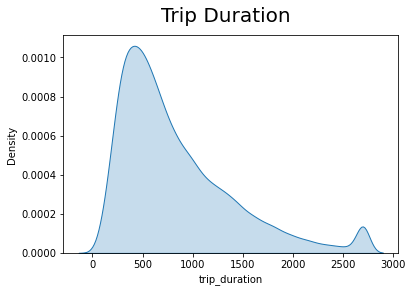

In [187]:

fig = plt.figure()

sns.kdeplot(df['trip_duration'],shade=True)

fig.suptitle(('Trip Duration'), fontsize=20)

Text(0.5, 0.98, 'Birth_Year')

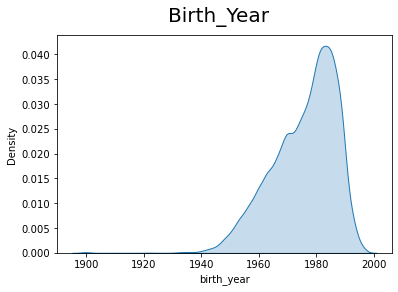

In [186]:
fig = plt.figure()

sns.kdeplot(df['birth_year'],shade=True)

fig.suptitle(('Birth_Year'), fontsize=20)

In [194]:
#changing the value of weekday to make it easier to sort them
df.loc[df["weekday"] == "Mon" , "weekday"] =  1
df.loc[df["weekday"] == "Sun" , "weekday"] =  0
df.loc[df["weekday"] == "Fri" , "weekday"] =  5
df.loc[df["weekday"] == "Wed" , "weekday"] =  3
df.loc[df["weekday"] == "Tue" , "weekday"] =  2
df.loc[df["weekday"] == "Thu" , "weekday"] =  4
df.loc[df["weekday"] == "Sat" , "weekday"] =  6

Text(0.5, 0.98, 'Start_hour')

<Figure size 432x288 with 0 Axes>

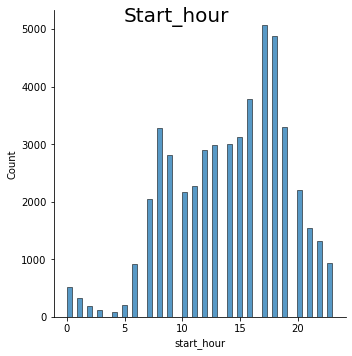

In [192]:
fig = plt.figure()

a=sns.displot(df, x="start_hour")

a.fig.suptitle(('Start_hour'), fontsize=20)

Text(0.5, 0.98, 'Distribution of trips by subcriber/non-subcriber')

<Figure size 432x288 with 0 Axes>

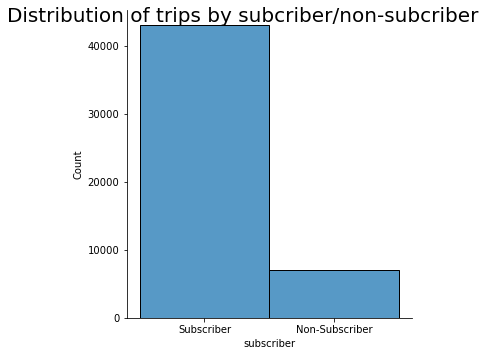

In [130]:
fig = plt.figure()

a=sns.displot(df, x="subscriber")

a.fig.suptitle(('Distribution of trips by subcriber/non-subcriber'), fontsize=20)

Text(0.5, 0.98, 'Distribution of trips by day of the week')

<Figure size 432x288 with 0 Axes>

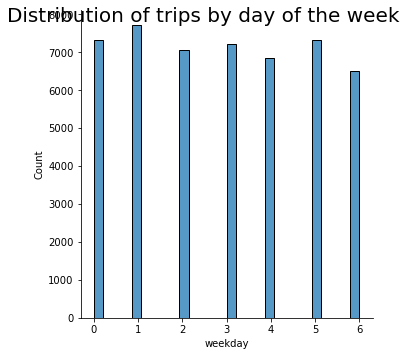

In [129]:
fig = plt.figure()

a=sns.displot(df, x="weekday")

a.fig.suptitle(('Distribution of trips by day of the week'), fontsize=20)